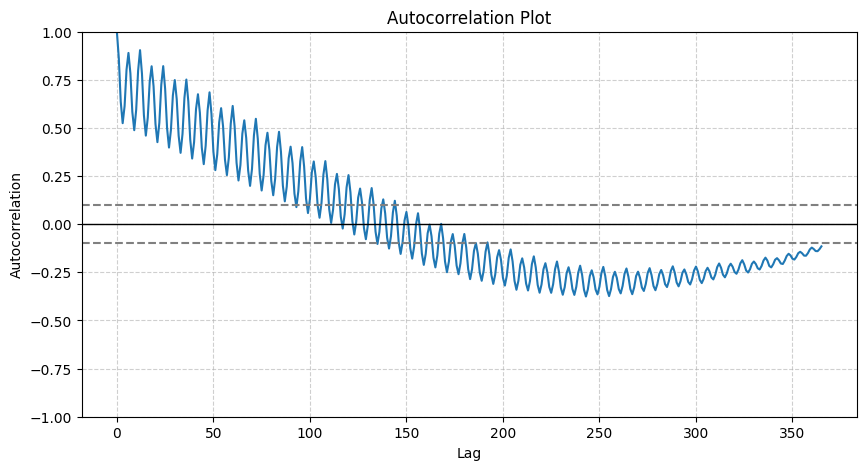

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

# Load dataset
df = pd.read_csv("ML471_S1_Datafile_Concept.csv")

# Convert DATE column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Sort by date
df = df.sort_values('DATE')

# Extract consumption series
ts = df['Consumption']

# Compute ACF values manually
lags = 365
acf_values = acf(ts, nlags=lags, fft=True)

# Confidence interval
conf = 1.96 / np.sqrt(len(ts))

# Plot
plt.figure(figsize=(10,5))
plt.plot(range(len(acf_values)), acf_values)   # ✅ pure wave line
plt.axhline(0, color='black', linewidth=1)
plt.axhline(conf, linestyle='--', color='gray')
plt.axhline(-conf, linestyle='--', color='gray')

plt.title("Autocorrelation Plot")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.ylim(-1, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

